In [ ]:
'''
Data source: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation

I applied the techniques we learn in the class to classify customers. There are 
4 type of customers given in this data set. Success rate seems very low. To remedy
I  compared results when same data cleaning methods from Kaggle users are applied.
However, there seem to be not much progresss. Most users have success rate around
50%. There is one .99 solution, which I checked also, gives %45 sucess rate 
'''
 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_tr = pd.read_csv("Train.csv")
df_te = pd.read_csv("Test.csv")

In [3]:
# EDA

In [4]:
df_tr

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
df_te

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [6]:
# Data manipulation 

In [7]:
df_te.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64

In [8]:
df = pd.concat([df_tr,df_te])
df = df.reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [10]:
df.drop(['ID'], axis = 1, inplace =True)

In [11]:
#df['Gender'].unique()
g = {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].map(g)

In [12]:
df['Ever_Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df['Ever_Married'].value_counts(normalize=True)

Yes    0.586673
No     0.413327
Name: Ever_Married, dtype: float64

<Axes: >

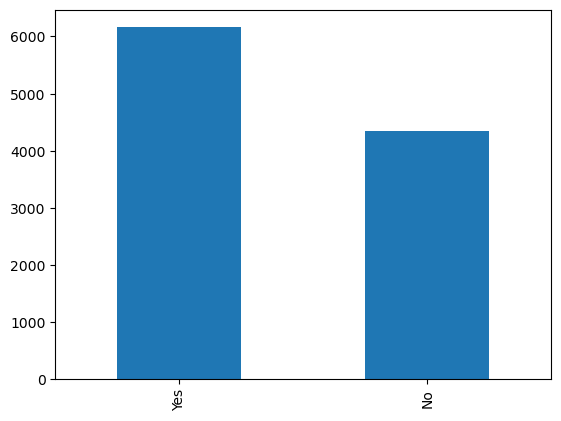

In [14]:
df['Ever_Married'].value_counts().plot.bar()

In [15]:
# Since house is almost equally likely to have one type for basements of TA
# and Gd, we fill empty rows randomly either TA or Gd
import random
random.uniform(0, 1)
def set_marital_status(self) :
    x = random.uniform(0, 1)
    if x > 0.59 :
        return 'Yes'
    else: 
        return 'No'
    
df['Ever_Married'].fillna(df['Ever_Married'].apply(set_marital_status), inplace=True) 

g = {'Yes':1, 'No':0}
df['Ever_Married'] = df['Ever_Married'].map(g)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  int64  
 1   Ever_Married     10695 non-null  int64  
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
 9   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 835.7+ KB


In [17]:
df['Graduated'].unique()

array(['No', 'Yes', nan], dtype=object)

In [18]:
df['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [19]:
#df['column_1'] = df['column_1'].fillna('yes' if condition else df['column_1'])
#condition = df['Profession'] == 'Engineer' or df['Profession'] == 'Lawyer' or \
#df['Profession'] == 'Executive' or df['Profession'] == 'Doctor'

#condition = df['Profession'].isin(['Engineer', 'Lawyer', 'Executive', 'Doctor'])
#condition = df['Profession'] == 'Engineer'
#df['Graduated'] = df['Graduated'].fillna('Yes' if df['Profession'] == 'Doctor' else df['Graduated'])

df['Graduated'] = np.where(df['Profession'] == 'Engineer','Yes', df['Graduated'])
df['Graduated'] = np.where(df['Profession'] == 'Lawyer','Yes', df['Graduated'])
df['Graduated'] = np.where(df['Profession'] == 'Executive','Yes', df['Graduated'])
df['Graduated'] = np.where(df['Profession'] == 'Doctor','Yes', df['Graduated'])

df['Graduated'] = df['Graduated'].fillna('No')

In [20]:
df['Graduated'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10695 entries, 0 to 10694
Series name: Graduated
Non-Null Count  Dtype 
--------------  ----- 
10695 non-null  object
dtypes: object(1)
memory usage: 83.7+ KB


In [21]:
#df['Profession'] = np.where(df['Profession']  ,'Self-employed', df['Profession'])

In [22]:
df['Profession'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10695 entries, 0 to 10694
Series name: Profession
Non-Null Count  Dtype 
--------------  ----- 
10533 non-null  object
dtypes: object(1)
memory usage: 83.7+ KB


<Axes: >

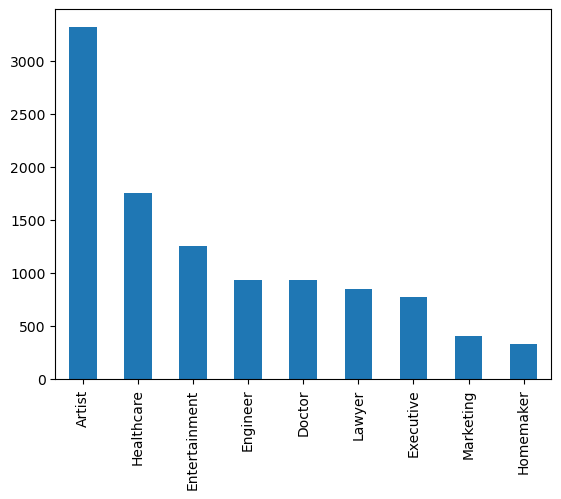

In [23]:
df['Profession'].value_counts().plot.bar()

In [24]:
df['Profession'] = df['Profession'].fillna( 'Artist' )

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  int64  
 1   Ever_Married     10695 non-null  int64  
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Var_1            10587 non-null  object 
 9   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 835.7+ KB


In [26]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [27]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# Work experience estimation
x = df[ ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
        'Spending_Score', 'Segmentation'] ]
x = pd.get_dummies(x,drop_first = True)


test_indices = df[ df['Work_Experience'].isnull() ].index
y_train = df['Work_Experience'].drop(test_indices)
x_test    = x.loc[test_indices]
x_train   = x.drop(test_indices)

x_train.shape, y_train.shape, x_test.shape


from xgboost import XGBRegressor
import xgboost as xgb
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

y_pred_xgb = model.predict(x_test)
df.loc[df['Work_Experience'].isnull(), 'Work_Experience'] = y_pred_xgb

In [29]:
x_train.shape, y_train.shape, x_test.shape

((9597, 17), (9597,), (1098, 17))

In [30]:
# Family size estimation
x = df[ ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
        'Spending_Score', 'Segmentation', 'Work_Experience'] ]
x = pd.get_dummies(x,drop_first = True)


test_indices = df[ df['Family_Size'].isnull() ].index
y_train = df['Family_Size'].drop(test_indices)
x_test    = x.loc[test_indices]
x_train   = x.drop(test_indices)

x_train.shape, y_train.shape, x_test.shape


from xgboost import XGBRegressor
import xgboost as xgb
xgb=XGBRegressor()
XGBC= XGBRegressor()
model=XGBC.fit(x_train,y_train)
pred=model.predict(x_test)

y_pred_xgb = model.predict(x_test)
df.loc[df['Family_Size'].isnull(), 'Family_Size'] = y_pred_xgb

<Axes: >

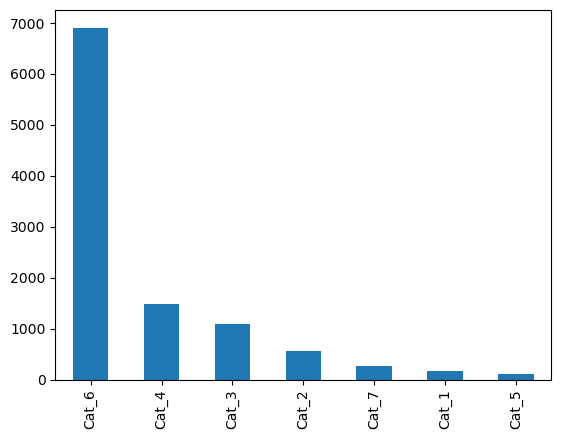

In [31]:
df['Var_1'].value_counts().plot.bar()

In [32]:
df['Var_1'] = df['Var_1'].fillna( 'Cat_6' )

In [33]:
cat = {'A':0, 'B':1, 'C':2, 'D':3 }
#cat = {'A':1, 'B':2, 'C':3, 'D':4 }
df['Segmentation'].unique()
df['Segmentation'] = df['Segmentation'].map(cat) 


In [34]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [35]:
x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']]

#x = df[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
#       'Work_Experience', 'Spending_Score', 'Family_Size']]

y = df['Segmentation']

In [36]:
y = y.astype(int)
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10695 entries, 0 to 10694
Series name: Segmentation
Non-Null Count  Dtype
--------------  -----
10695 non-null  int32
dtypes: int32(1)
memory usage: 41.9 KB


In [37]:
x = pd.get_dummies(x, drop_first = True)

In [38]:
x_train = x[:8068]
x_test = x[8068:]
y_train = y[:8068]
y_test = y[8068:]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8068, 22), (2627, 22), (8068,), (2627,))

In [39]:
def algo_test(x,y):
def algo_test(x_train,x_test,y_train,y_test):
    
    import numpy as np

    from scipy import stats
    import matplotlib.pyplot as plt
    %matplotlib inline 
    import seaborn as sns


    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
    from sklearn.tree import ExtraTreeClassifier
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor 

    from sklearn.model_selection import train_test_split

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from xgboost import XGBClassifier

    import warnings
    warnings.filterwarnings('ignore')
#plt.style.use('')

    
    
    G = GaussianNB()
    B = BernoulliNB()
    #K = KNeighborsClassifier()
    L = LogisticRegression()
    D = DecisionTreeClassifier()
    RF = RandomForestClassifier()
    ETC = ExtraTreesClassifier()
    XG = XGBClassifier()

    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    algos = [G,B,L,D, RF, ETC, XG]
    #algos = [G,B,L,D,  RF, ETC]
    
    #algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree", "Random Forest", "ExtraTreeClassifier" ]
    algo_names = [ "Gaussian", "Bernoulli", "Logistic Regression", "Decision Tree", \
                  "Random Forest", "ExtraTreeClassifier","XGBClassifier" ]
    
    ASC = [];
    
    result =  result = pd.DataFrame(columns =['Accuracy_Score'], index = algo_names)
    
    i = 0;
    for algo in algos :
        
        algo.fit(x_train,y_train)
        #print (accuracy_score(  y_test, algo.predict(x_test) ))
        ASC.append(  accuracy_score(  y_test, algo.predict(x_test) ) )
        
        print( "Confusion matrix: ",format(algo_names[i]) )
        i = i+1;
        print ( confusion_matrix(algo.predict(x_test),y_test) )
        #print (classification_report(y_test,algo.predict(x_test) ))
        
        #algo.fit(x,y)
        #print (accuracy_score(  y, algo.predict(x) ))
        #ASC.append(  accuracy_score(  y, algo.predict(x) ) )
    
    
    result.Accuracy_Score = ASC;

    return result.sort_values('Accuracy_Score', ascending=False)

In [40]:
algo_test(x_train,x_test,y_train,y_test)
#algo_test(x,y)




Confusion matrix:  Gaussian
[[196 135  66 135]
 [ 31  54  45  20]
 [190 239 320 107]
 [122  65  63 351]]
Confusion matrix:  Bernoulli
[[161 120  56 120]
 [ 34  45  41  23]
 [156 212 306  93]
 [188 116  91 377]]
Confusion matrix:  Logistic Regression
[[297 220 120 190]
 [ 35  39  37  16]
 [108 183 283  71]
 [ 99  51  54 336]]
Confusion matrix:  Decision Tree
[[202 150 101 178]
 [121 127 129  77]
 [102 121 204  79]
 [114  95  60 279]]
Confusion matrix:  Random Forest
[[214 140  82 129]
 [114 134 121  66]
 [ 93 124 222  61]
 [118  95  69 357]]
Confusion matrix:  ExtraTreeClassifier
[[213 138  85 150]
 [120 127 124  60]
 [ 88 129 220  71]
 [118  99  65 332]]
Confusion matrix:  XGBClassifier
[[240 131  79 154]
 [102 140  97  60]
 [ 75 141 261  45]
 [122  81  57 354]]


,Accuracy_Score
XGBClassifier,0.465171
Logistic Regression,0.446470
Random Forest,0.433380
Gaussian,0.430575
ExtraTreeClassifier,0.417017
Bernoulli,0.415615
Decision Tree,0.379617


In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the neural network model
model = keras.Sequential([
    layers.Input(shape=(22,)),      # Update input shape to (22,)
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=250, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_train, y_train)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/250
202/202 [==============================] - 2s 9ms/step - loss: 1.2945 - accuracy: 0.3985 - val_loss: 1.1884 - val_accuracy: 0.4684
Epoch 2/250
202/202 [==============================] - 2s 10ms/step - loss: 1.1695 - accuracy: 0.4721 - val_loss: 1.1575 - val_accuracy: 0.4783
Epoch 3/250
202/202 [==============================] - 2s 10ms/step - loss: 1.1381 - accuracy: 0.4905 - val_loss: 1.1217 - val_accuracy: 0.5074
Epoch 4/250
202/202 [==============================] - 2s 9ms/step - loss: 1.1232 - accuracy: 0.4926 - val_loss: 1.1216 - val_accuracy: 0.5031
Epoch 5/250
202/202 [==============================] - 2s 8ms/step - loss: 1.1078 - accuracy: 0.4981 - val_loss: 1.1201 - val_accuracy: 0.4988
Epoch 6/250
202/202 [==============================] - 2s 10ms/step - loss: 1.0997 - accuracy: 0.5115 - val_loss: 1.1044 - val_accuracy: 0.4994
Epoch 7/250
202/202 [==============================] - 2s 10ms/step - loss: 1.0900 - accuracy: 0.5127 - val_loss: 1.0869 - val_accuracy: 0.

Epoch 58/250
202/202 [==============================] - 2s 10ms/step - loss: 0.8466 - accuracy: 0.6190 - val_loss: 1.2948 - val_accuracy: 0.5056
Epoch 59/250
202/202 [==============================] - 2s 8ms/step - loss: 0.8791 - accuracy: 0.6108 - val_loss: 1.2593 - val_accuracy: 0.5124
Epoch 60/250
202/202 [==============================] - 2s 10ms/step - loss: 0.8363 - accuracy: 0.6266 - val_loss: 1.3305 - val_accuracy: 0.5161
Epoch 61/250
202/202 [==============================] - 2s 10ms/step - loss: 0.8345 - accuracy: 0.6269 - val_loss: 1.3528 - val_accuracy: 0.5136
Epoch 62/250
202/202 [==============================] - 2s 9ms/step - loss: 0.8217 - accuracy: 0.6345 - val_loss: 1.3238 - val_accuracy: 0.4969
Epoch 63/250
202/202 [==============================] - 2s 9ms/step - loss: 0.8137 - accuracy: 0.6353 - val_loss: 1.3882 - val_accuracy: 0.5043
Epoch 64/250
202/202 [==============================] - 2s 9ms/step - loss: 0.8118 - accuracy: 0.6326 - val_loss: 1.4869 - val_accura

202/202 [==============================] - 2s 9ms/step - loss: 0.4152 - accuracy: 0.8139 - val_loss: 3.4449 - val_accuracy: 0.4857
Epoch 171/250
202/202 [==============================] - 1s 7ms/step - loss: 0.4374 - accuracy: 0.8024 - val_loss: 3.6918 - val_accuracy: 0.4665
Epoch 172/250
202/202 [==============================] - 2s 9ms/step - loss: 0.4652 - accuracy: 0.7938 - val_loss: 3.2270 - val_accuracy: 0.4796
Epoch 173/250
202/202 [==============================] - 2s 9ms/step - loss: 0.4517 - accuracy: 0.7956 - val_loss: 3.4278 - val_accuracy: 0.4727
Epoch 174/250
202/202 [==============================] - 2s 8ms/step - loss: 0.4148 - accuracy: 0.8107 - val_loss: 3.3700 - val_accuracy: 0.4765
Epoch 175/250
202/202 [==============================] - 2s 9ms/step - loss: 0.3986 - accuracy: 0.8179 - val_loss: 3.8462 - val_accuracy: 0.4703
Epoch 176/250
202/202 [==============================] - 2s 9ms/step - loss: 0.4097 - accuracy: 0.8162 - val_loss: 3.6266 - val_accuracy: 0.4690

In [48]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

83/83 [==============================] - 0s 3ms/step - loss: 9.8075 - accuracy: 0.3194
